In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
d_A =  np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\All_n2.npy")

In [22]:
len(d_A)/120

1200.0

In [23]:
%matplotlib qt
plt.plot(d_A)

In [24]:
d_A = np.where(d_A<100, 200, d_A)

In [25]:
plt.plot(d_A)

In [26]:
from sklearn import preprocessing

In [27]:
d_A_norm = preprocessing.minmax_scale(d_A)

In [29]:
plt.plot(d_A_norm)

In [30]:
#all_path_num
a_p_n = 120
#all_rotation_num
a_r_n = 1200
#moving avg path step
m_a_p_s = 10

w_size = a_r_n*m_a_p_s
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

In [31]:
d_A_norm = np.convolve(d_A_norm,v, mode='valid')

In [34]:
len(d_A_norm)

110.00083333333333

In [33]:
plt.plot(d_A_norm)

In [35]:
interval = 1200
# d = np.load(rf"Z:\200 Produced_data\20230123\CF\max8308\All_121-460_MA.npy")
new = d_A_norm[:-1]
print(len(new)/interval)
new = new.reshape(interval, int(len(new)/interval))
avg = np.average(new,axis=1)
avg = avg.reshape(len(avg),1)
avg = np.repeat(avg, 10, axis=1)
new_n = np.block([new,avg])
new_n = new_n.ravel()
print(len(new_n)/interval)
print("------------------")
# np.save(rf"Z:\200 Produced_data\20230123\CF\max8308\_extend_All_121-460_MA", new_n)

110.0
120.0
------------------


In [36]:
plt.plot(new_n)

In [40]:
cfm = new_n

In [106]:
tool = "B"
location = "spindle"
fq = 6

In [107]:
aem = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_{location}_1-120_s{fq}.npy")
cfm = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\CF\CF_1-120.npy")

In [108]:
ae = aem[int(len(aem)/12*1):int(len(aem)/12*2)]
cf = cfm[int(len(cfm)/12*1):int(len(cfm)/12*2)]

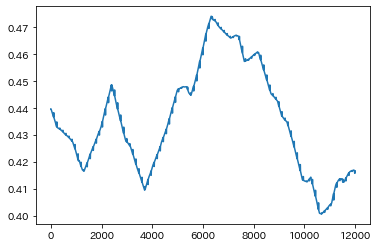

In [109]:
%matplotlib inline
plt.plot(ae)

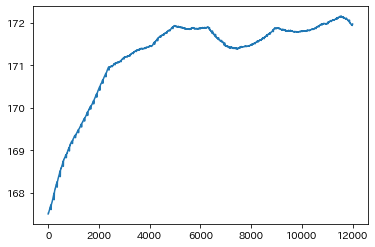

In [110]:
plt.plot(cf)

In [111]:
np.corrcoef(ae,cf)

array([[1.        , 0.07839894],
       [0.07839894, 1.        ]])

In [68]:
aem_s = aem.reshape(int(len(aem)/12),12)
cfm_s = cfm.reshape(int(len(cfm)/12),12)

In [69]:
corr_matrix = np.corrcoef(aem_s[1],cfm_s[1])

In [70]:
corr_matrix

array([[1.        , 0.99257107],
       [0.99257107, 1.        ]])

In [73]:
plt.plot(aem_s[1])
# plt.plot(cfm_s[0])

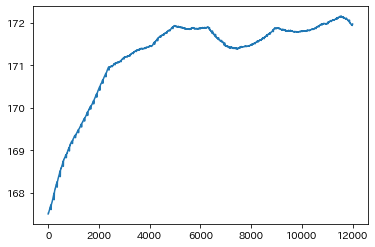

In [104]:
cf = cfm[int(len(cfm)/12*1):int(len(cfm)/12*2)]
ae = aem[int(len(aem)/12*1):int(len(aem)/12*2)]
# plt.plot(aem[int(len(aem)/12*1):int(len(aem)/12*2)])
plt.plot(cf)

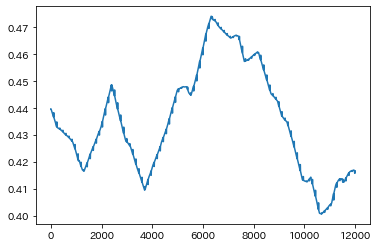

In [105]:
%matplotlib inline
plt.plot(ae)

In [103]:
np.corrcoef(ae,cf)

array([[1.        , 0.07839894],
       [0.07839894, 1.        ]])

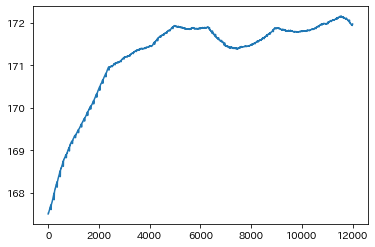

In [91]:
%matplotlib inline
plt.plot(cfm[int(len(aem)/12*1):int(len(cfm)/12*2)])

In [77]:
int(len(aem)/12*2)

24000

In [80]:
len(aem)/12

24000.0